# Practice 4.
## Objectives:
1. Do a simple Linear classifier
2. Deal with *colinearity*
3. Understand how the logistic regression works
4. Learn to clean up databases.

Aplication:
Data basse: Data set from the UCI Machine Learning Repository (http://archive.ics.uci.edu/ml)

Bank marketing prediction Data Set: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
Predict **has the client subscribed a term deposit? (binary: 'yes','no')**.

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
File = "bank-full.xls"
Filename = os.path.join(os.getcwd(),'Data',File)
print(f'Filename with path: \n {Filename}')

Filename with path: 
 C:\Users\raulc\Desktop\Master\Q2\ML\FourthPractice\Data\bank-full.xls


In [3]:
Data = pd.read_excel(Filename)
Data.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


### First take a glimpse of the numerical data

In [4]:
Data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.16,257.53,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.76,3.10,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.20,100.13,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.58,2.30,0.0,0.0,0.0,0.0,275.0


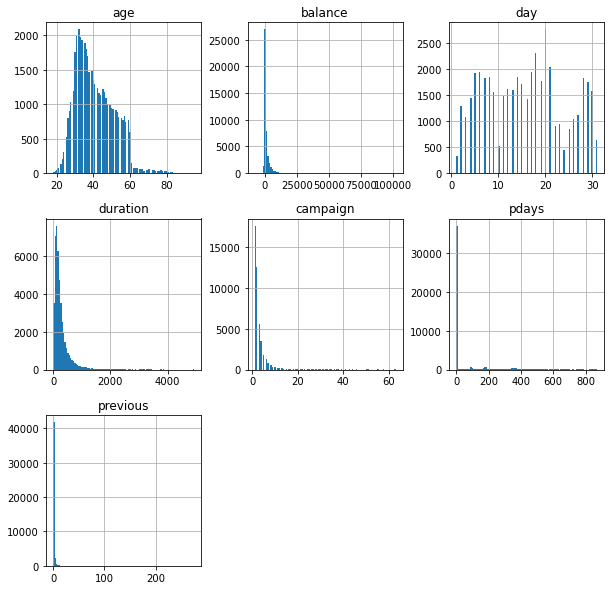

In [5]:
ax =Data.hist(figsize= (10,10),bins = 100)

Lets see if the follow up of the client "pdays" changes something


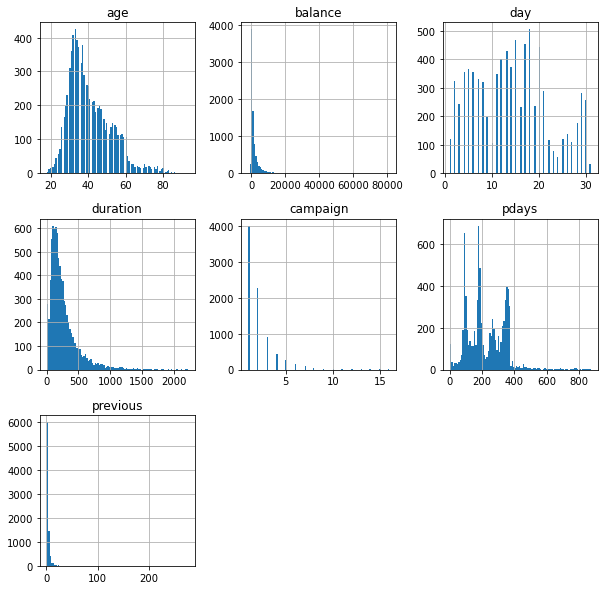

In [6]:
print('Lets see if the follow up of the client "pdays" changes something')
ax = Data[Data['pdays']>0].hist(figsize= (10,10),bins = 100)

In [7]:
Data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Clean the categorial features
### First we select the columns that are string (objects)

In [8]:
Data.select_dtypes(include=['object']).T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician,...,management,admin.,student,retired,technician,technician,retired,retired,blue-collar,entrepreneur
marital,married,single,married,married,single,married,single,divorced,married,single,...,married,single,single,married,single,married,divorced,married,married,married
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary,...,tertiary,secondary,tertiary,secondary,secondary,tertiary,primary,secondary,secondary,secondary
default,no,no,no,no,no,no,no,yes,no,no,...,no,no,no,no,no,no,no,no,no,no
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no
loan,no,no,yes,no,no,no,yes,no,no,no,...,no,no,no,no,yes,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,telephone,cellular
month,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
poutcome,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,success,unknown,unknown,failure,unknown,unknown,unknown,success,unknown,other
y,no,no,no,no,no,no,no,no,no,no,...,yes,yes,yes,yes,yes,yes,yes,yes,no,no


In [9]:
StringColumns = Data.select_dtypes(include=['object']).columns.values
print(f'Columns that need a numerical coding: {StringColumns}')

Columns that need a numerical coding: ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'y']


## Next we correct some of the features
###  Note the 'unique' method for DataFrames

In [10]:
TypesOfJobs = list(Data['job'].unique())
print(f'Types of Jobs:{TypesOfJobs}')
print()
print(f' Number of categories: {len(TypesOfJobs)}')

Types of Jobs:['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']

 Number of categories: 12


### As there is a relationship between salary and profesion we will introduce an adhoc code.

1.   Remember the use of the 'map' instruction.
2.   If you are interested in big data look for 'map-reduce'.

In [11]:
CodingJob = dict()
CodingJob['management'] = 12
CodingJob['technician'] = 10
CodingJob['entrepreneur'] = 11
CodingJob['blue-collar'] = 9
CodingJob['unknown'] = 5
CodingJob['retired'] = 6
CodingJob['admin.'] = 7
CodingJob['services'] = 8
CodingJob['self-employed'] = 1
CodingJob['unemployed'] = 4
CodingJob['housemaid'] = 3
CodingJob['student'] = 2
Data['job'] = Data['job'].map(CodingJob)

In [12]:
Default = dict()
Default['no'] = -1
Default['yes'] = +1
Data['default'] = Data['default'].map(Default)

###  We code the output 'y'

Remember we have a logistic regression as classifier:

$y = \frac{1}{1+e^{\beta^T X}}\longrightarrow$    Range: (0,1)

In [13]:
y = dict()
y['no'] = 0.
y['yes'] = +1.
Data['y'] = Data['y'].map(y)

In [14]:
MeanValue = Data['y'].mean()*100.
print(f' The proportion of yes: {MeanValue:2.2f} %')
print('Note that the classes are unbalanced. In theory we will see how to deal with this phenomenon')

 The proportion of yes: 11.70 %
Note that the classes are unbalanced. In theory we will see how to deal with this phenomenon


## Homework: <font color='red'> Do the same procedure for the rest of the categorical variables.</font>  


We assign numbers to each of the types inside a feature. 

In [15]:
TypesOfMarital = list(Data['marital'].unique())
TypesOfEducation = list(Data['education'].unique())
TypesOfContact = list(Data['contact'].unique())
TypesOfMonth = list(Data['month'].unique())
TypesOfpOutcome = list(Data['poutcome'].unique())

In [16]:
TypesOfMarital
Maritaldic = dict()
Maritaldic['single'] = 1
Maritaldic['divorced'] = 2
Maritaldic['married'] = 3
Data['marital'] = Data['marital'].map(Maritaldic)

Since we are intoducing a pattern in the data by assigning this dummy variables indexes, we should do it in what we think it is the most meaningful way.

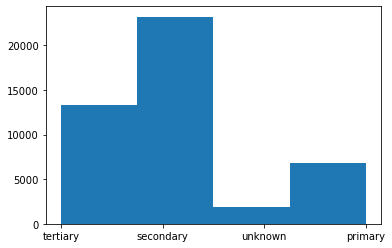

In [17]:
TypesOfEducation
plt.hist(Data['education'], bins=4)
Eddic = dict()
Eddic['primary'] = 1
Eddic['secondary'] = 2
Eddic['unknown'] = 3
Eddic['tertiary'] = 4
Data['education'] = Data['education'].map(Eddic)

In [18]:
TypesOfMonth = list(Data['month'].unique())
Monthdic = dict()
Monthdic['jan'] = 1
Monthdic['feb'] = 2
Monthdic['mar'] = 3
Monthdic['apr'] = 4
Monthdic['may'] = 5
Monthdic['jun'] = 6
Monthdic['jul'] = 7
Monthdic['aug'] = 8
Monthdic['sep'] = 9
Monthdic['oct'] = 10
Monthdic['nov'] = 11
Monthdic['dec'] = 12
Data['month'] = Data['month'].map(Monthdic)

In [19]:
TypesOfCont = list(Data['contact'].unique())
Contdic = dict()
Contdic['unknown'] = 1
Contdic['cellular'] = 2
Contdic['telephone'] = 3
Data['contact'] = Data['contact'].map(Contdic)

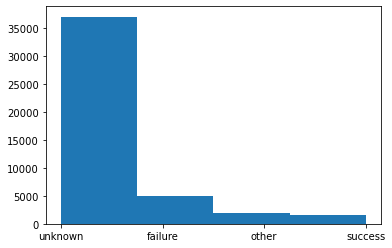

In [20]:
TypesOfOut = list(Data['poutcome'].unique())
plt.hist(Data['poutcome'], bins=4)
Contoutc = dict()
Contoutc['unknown'] = 1
Contoutc['failure'] = 2
Contoutc['other'] = 3
Contoutc['success'] = 4
Data['poutcome'] = Data['poutcome'].map(Contoutc)

In [21]:
Data.select_dtypes(include=['object']).T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no
loan,no,no,yes,no,no,no,yes,no,no,no,...,no,no,no,no,yes,no,no,no,no,no


We could place unknown in the middle of secondary and tertiary, since most of the population are over there. 

Lastly we use the same dictionary for binary categories: 'yes', 'no'

In [22]:
Data['housing'] = Data['housing'].map(Default)
Data['loan'] = Data['loan'].map(Default)

In [23]:
Data.select_dtypes(include=['object']).T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210


## Homework: <font color='red'> Do an exploratory data analysis in order to understand the database.</font>  

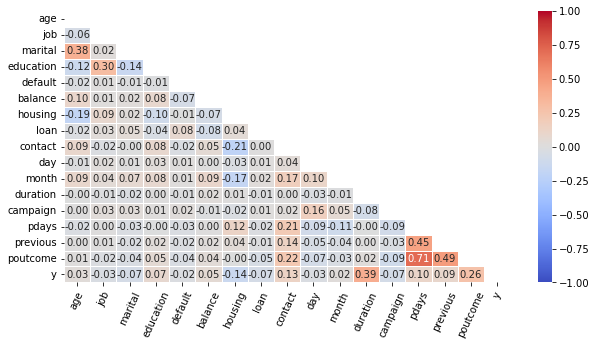

In [24]:
import seaborn as sns
df = Data            # For simplicity

fig, ax = plt.subplots(figsize=(10, 5))

df_corr = df.corr(method='pearson')
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=df_corr, vmin=-1, vmax=1, mask=mask, 
            cmap=sns.color_palette('coolwarm', as_cmap=True),
            annot=True, fmt='.2f', linewidths=.5, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=65);

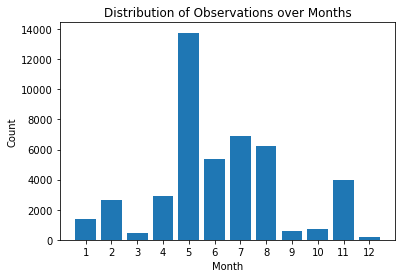

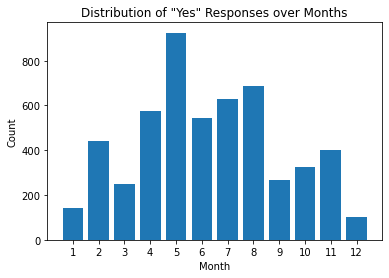

In [25]:
# Count the number of observations per month
month_counts = df['month'].value_counts()
x_ticks = list(range(1, 13))

# Plot the distribution of observations over the months
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Observations over Months')
plt.xticks(x_ticks)
plt.show()

# Count the number of 'yes' responses per month
yes_counts = df[df['y'] == 1]['month'].value_counts()

# Plot the 'yes' distribution over the months
plt.bar(yes_counts.index, yes_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of "Yes" Responses over Months')
plt.xticks(x_ticks)
plt.show()

We are unlikely to find out which period of year is more or less successful in terms of YES-answers, because :
- the number of observations is highly varied by month and year (uneven distributions within every year);

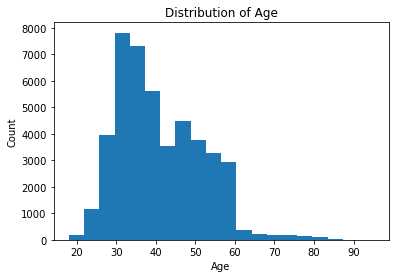

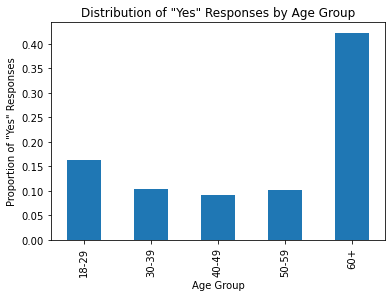

In [26]:
# Create a histogram of the job distribution
x_ticks = list(range(1, 13))

plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Define age groups
bins = [18, 30, 40, 50, 60, np.inf]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Calculate the proportion of 'yes' responses for each age group
prop_yes = df[df['y'] == 1].groupby('age_group')['y'].count() / df.groupby('age_group')['y'].count()
#['y'].value_counts(normalize=True).loc[:, 1]

# Create a box plot of 'yes' proportion by age group
prop_yes.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Proportion of "Yes" Responses')
plt.title('Distribution of "Yes" Responses by Age Group')
plt.show()

df = df.drop('age_group', axis=1)

- Median age: 38 y.o.
- Mean age: 40 y.o.
- People older than 60 y.o. are more likely to agree to subscribe a bank term deposit, but in general, there is no correlation between the age and YES-proportion.

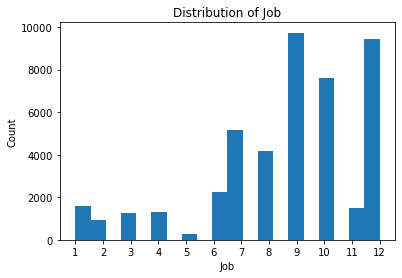

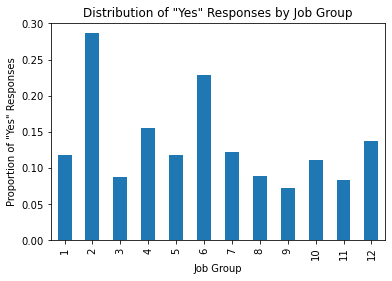

In [27]:
# Create a histogram of the Job distribution
plt.hist(df['job'], bins=20)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Distribution of Job')
plt.xticks(x_ticks)
plt.show()



# Calculate the proportion of 'yes' responses for each age group
prop_yes = df[df['y'] == 1].groupby('job')['y'].count() / df.groupby('job')['y'].count()
#['y'].value_counts(normalize=True).loc[:, 1]

# Create a box plot of 'yes' proportion by Job group
prop_yes.plot(kind='bar')
plt.xlabel('Job Group')
plt.ylabel('Proportion of "Yes" Responses')
plt.title('Distribution of "Yes" Responses by Job Group')
plt.show()

Conclusions:
- Most of the people in the dataset are from working class (admin + blue-collar + technician + services, > 70%)
- There is no substantial evidence of relationships between job's categories and YES-answers.

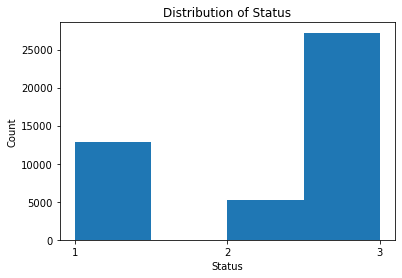

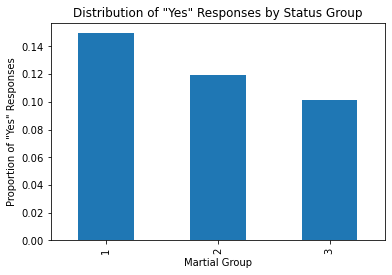

In [28]:
# Create a histogram of the matrital distribution
x_ticks = list(range(1, 4))


plt.hist(df['marital'], bins=4)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status')
plt.xticks(x_ticks)
plt.show()



# Calculate the proportion of 'yes' responses for each age group
prop_yes = df[df['y'] == 1].groupby('marital')['y'].count() / df.groupby('marital')['y'].count()
#['y'].value_counts(normalize=True).loc[:, 1]

# Create a box plot of 'yes' proportion by age group
prop_yes.plot(kind='bar')
plt.xlabel('Martial Group')
plt.ylabel('Proportion of "Yes" Responses')
plt.title('Distribution of "Yes" Responses by Status Group')
plt.show()

Conclusions:

- Most people in the dataset are married (61%).
- There is no substantial evidence of relationships between marital's categories and YES-answers.

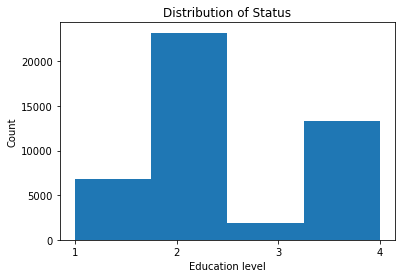

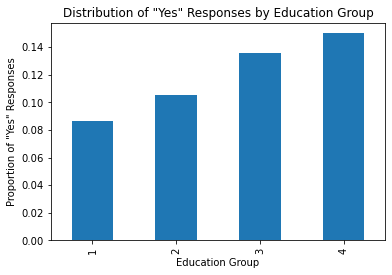

In [29]:
# Create a histogram of the education distribution
x_ticks = list(range(1, 5))


plt.hist(df['education'], bins=4)
plt.xlabel('Education level')
plt.ylabel('Count')
plt.title('Distribution of Status')
plt.xticks(x_ticks)
plt.show()



# Calculate the proportion of 'yes' responses for each age group
prop_yes = df[df['y'] == 1].groupby('education')['y'].count() / df.groupby('education')['y'].count()
#['y'].value_counts(normalize=True).loc[:, 1]

# Create a box plot of 'yes' proportion by age group
prop_yes.plot(kind='bar')
plt.xlabel('Education Group')
plt.ylabel('Proportion of "Yes" Responses')
plt.title('Distribution of "Yes" Responses by Education Group')
plt.show()

Conclusions:

- Most people in the dataset have unknown education level.
- Seems that the higher the education (disregarding unknwons), the higher the YES-answers percentage.

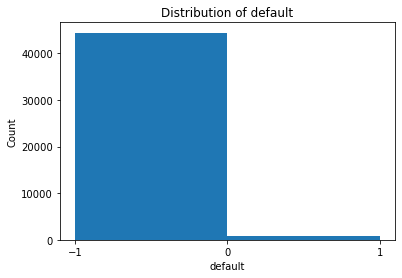

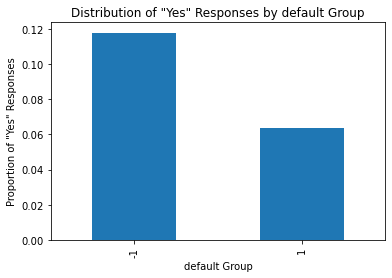

In [30]:
# Create a histogram of the default
x_ticks = list(range(-1, 2))


plt.hist(df['default'], bins=2)
plt.xlabel('default')
plt.ylabel('Count')
plt.title('Distribution of default')
plt.xticks(x_ticks)
plt.show()



# Calculate the proportion of 'yes' responses for each age group
prop_yes = df[df['y'] == 1].groupby('default')['y'].count() / df.groupby('default')['y'].count()
#['y'].value_counts(normalize=True).loc[:, 1]

# Create a box plot of 'yes' proportion by age group
prop_yes.plot(kind='bar')
plt.xlabel('default Group')
plt.ylabel('Proportion of "Yes" Responses')
plt.title('Distribution of "Yes" Responses by default Group')
plt.show()

Conclusion:

- Most people in the dataset have NO credit in default.
- It seems like people with NO credit in default are more likely to agree to subscribe a bank term deposit.

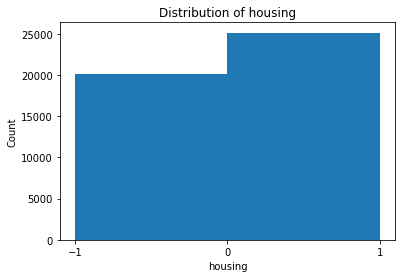

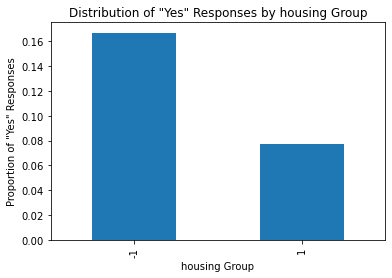

In [31]:
# Create a histogram of the Housing
x_ticks = list(range(-1, 2))


plt.hist(df['housing'], bins=2)
plt.xlabel('housing')
plt.ylabel('Count')
plt.title('Distribution of housing')
plt.xticks(x_ticks)
plt.show()



# Calculate the proportion of 'yes' responses for each age group
prop_yes = df[df['y'] == 1].groupby('housing')['y'].count() / df.groupby('housing')['y'].count()
#['y'].value_counts(normalize=True).loc[:, 1]

# Create a box plot of 'yes' proportion by age group
prop_yes.plot(kind='bar')
plt.xlabel('housing Group')
plt.ylabel('Proportion of "Yes" Responses')
plt.title('Distribution of "Yes" Responses by housing Group')
plt.show()

Conclusion:

- The number of people who have a housing loan is almost equal to the number of people who haven't (52% vs 45%).
- There is no substantial evidence of relationships between housing's categories and YES-answers.

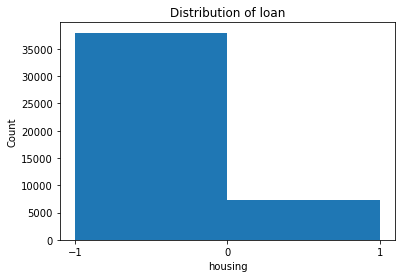

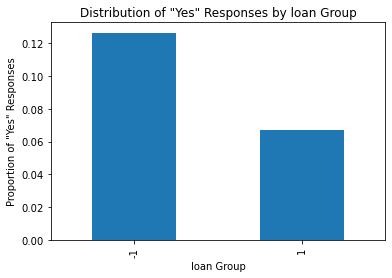

In [32]:
# Create a histogram of the loan
x_ticks = list(range(-1, 2))


plt.hist(df['loan'], bins=2)
plt.xlabel('housing')
plt.ylabel('Count')
plt.title('Distribution of loan')
plt.xticks(x_ticks)
plt.show()



# Calculate the proportion of 'yes' responses for each age group
prop_yes = df[df['y'] == 1].groupby('loan')['y'].count() / df.groupby('loan')['y'].count()
#['y'].value_counts(normalize=True).loc[:, 1]

# Create a box plot of 'yes' proportion by age group
prop_yes.plot(kind='bar')
plt.xlabel('loan Group')
plt.ylabel('Proportion of "Yes" Responses')
plt.title('Distribution of "Yes" Responses by loan Group')
plt.show()

Conclusion:

- The majority of people don't have a personal loan.
- There is no substantial evidence of relationships between loan's categories and YES-answers.

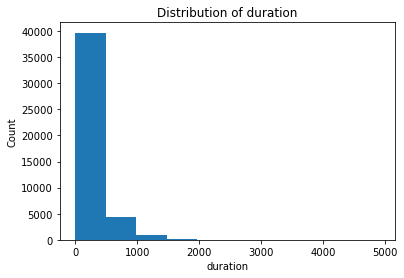

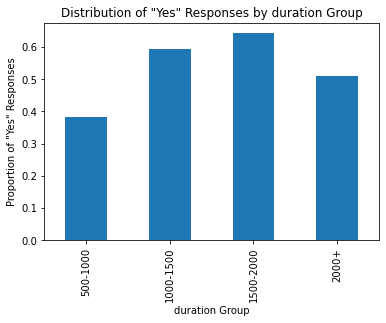

In [33]:
# Create a histogram of the duration


plt.hist(df['duration'], bins=10)
plt.xlabel('duration')
plt.ylabel('Count')
plt.title('Distribution of duration')
plt.show()

# Define duration groups
bins = [500, 1000, 1500, 2000, np.inf]
labels = ['500-1000', '1000-1500', '1500-2000', '2000+']
df['duration_group'] = pd.cut(df['duration'], bins=bins, labels=labels)

# Calculate the proportion of 'yes' responses for each age group
prop_yes = df[df['y'] == 1].groupby('duration_group')['y'].count() / df.groupby('duration_group')['y'].count()
#['y'].value_counts(normalize=True).loc[:, 1]

# Create a box plot of 'yes' proportion by age group
prop_yes.plot(kind='bar')
plt.xlabel('duration Group')
plt.ylabel('Proportion of "Yes" Responses')
plt.title('Distribution of "Yes" Responses by duration Group')
plt.show()

df = df.drop('duration_group', axis=1)

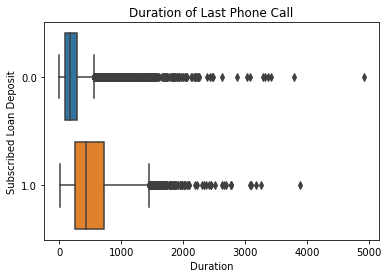

In [34]:
g = sns.boxplot(data=df, x='duration', y='y',orient = 'h')

g.set_xlabel('Duration')
g.set_ylabel('Subscribed Loan Deposit')
g.set_title('Duration of Last Phone Call')

plt.show(g);

Conclusion:

- If we do not consider the last group, the longer the call is the higher chances are to get a positive decision (and the common sense says the same).

We could carry the exploratory analysis forever, but now we have enough knowledge to start building something...

###  We delete the columns that have not been used

In [35]:
Data = df
Data = Data.select_dtypes(exclude=['object'])

In [36]:
Data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
job,45211.0,8.63,2.85,1.0,7.0,9.0,10.0,12.0
marital,45211.0,2.32,0.88,1.0,1.0,3.0,3.0,3.0
education,45211.0,2.48,1.07,1.0,2.0,2.0,4.0,4.0
default,45211.0,-0.96,0.27,-1.0,-1.0,-1.0,-1.0,1.0
balance,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.11,0.99,-1.0,-1.0,1.0,1.0,1.0
loan,45211.0,-0.68,0.73,-1.0,-1.0,-1.0,-1.0,1.0
contact,45211.0,1.78,0.55,1.0,1.0,2.0,2.0,3.0
day,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0


### Scatter plot with a color per class

In [37]:
if False:
    ax = pd.plotting.scatter_matrix(Data,c =Data['y'], figsize = (10,10))

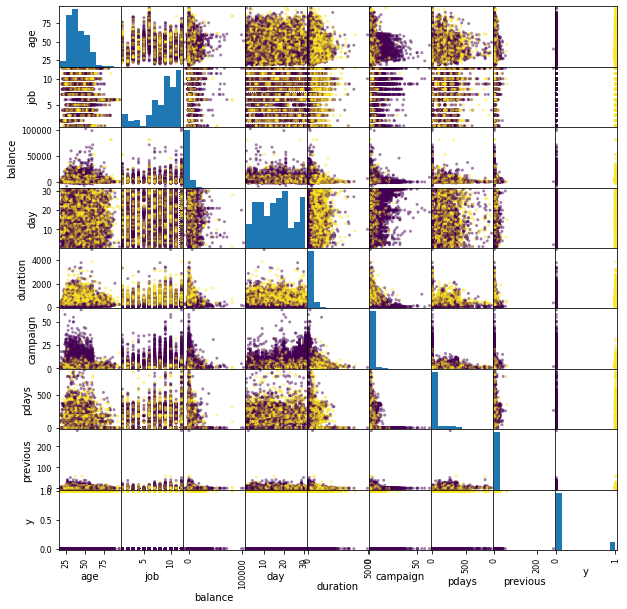

## We do the partition in training and testing data.

### We will use a helper function

In [38]:
def PartitionOfDatabase(Data,Fraction = 0.75):
    NumSamples, NumFeatures = Data.shape
    Index = list(range(NumSamples))
    RandomIndex = np.random.permutation(Index)
    NumTrainElements = int(Fraction*NumSamples)
    TrainIndex = RandomIndex[:NumTrainElements]
    TestIndex = RandomIndex[NumTrainElements:]
    TrainDB = Data.iloc[TrainIndex]
    TestDB = Data.iloc[TestIndex]
    return TrainDB,TestDB

In [39]:
TrainDB,TestDB = PartitionOfDatabase(Data,Fraction = 0.75)

In [40]:
print('Next we correct the data types')
TrainDB.dtypes

Next we correct the data types


age            int64
job            int64
marital        int64
education      int64
default        int64
balance        int64
housing        int64
loan           int64
contact        int64
day            int64
month          int64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome       int64
y            float64
dtype: object

In [41]:
TrainDB = TrainDB.astype('float')
TestDB = TestDB.astype('float')

### Lets try a logistic classifier

In [42]:
y = TrainDB['y']
InputFeatures = [fea for fea in TrainDB.columns if  fea != 'y']
print(f' Input variables: \n {InputFeatures}')
print('_'*50)
X = TrainDB[InputFeatures]

 Input variables: 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
__________________________________________________


In [43]:
logreg = LogisticRegression(solver='newton-cg',penalty = 'l2',C=10,max_iter = 1000,fit_intercept = True)
logreg.fit(X, y)

LogisticRegression(C=10, max_iter=1000, solver='newton-cg')

## Homework: <font color='red'> Explain a strategy of classification by reading the coefficients, which is the relationship between the meaning of each variable (and statistical distribution), its sign and the absolute value.</font>  

In logistic regression, the coefficients represent the change in the log-odds of the outcome for a one-unit change in the corresponding input variable. The log-odds is the logarithm of the odds, which is the ratio of the probability of the outcome to the probability of not the outcome.

The sign of the coefficient indicates the direction of the relationship between the input variable and the outcome. If the coefficient is positive, an increase in the input variable leads to an increase in the log-odds of the outcome, which means the input variable is positively associated with the outcome. If the coefficient is negative, an increase in the input variable leads to a decrease in the log-odds of the outcome, which means the input variable is negatively associated with the outcome.

The absolute value of the coefficient indicates the strength of the association between the input variable and the outcome. Larger absolute values indicate stronger associations.

Additionally, it's important to consider the statistical significance of the coefficients, which indicates whether the association between the input variable and the outcome is likely due to chance or is a real effect. This can be determined by looking at the p-value or confidence interval associated with each coefficient.

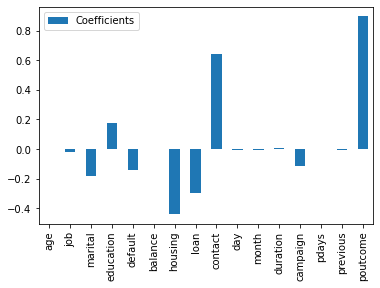

In [44]:
Features = X.columns
df = pd.DataFrame(data = logreg.coef_.T, index = Features, columns = ['Coefficients'] )
ax = df.plot.bar()

In [45]:
print('WHY. Hint')
Data.describe().T

WHY. Hint


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,8.631771,2.847568,1.0,7.0,9.0,10.0,12.0
marital,45211.0,2.319037,0.884908,1.0,1.0,3.0,3.0,3.0
education,45211.0,2.477937,1.068177,1.0,2.0,2.0,4.0,4.0
default,45211.0,-0.963947,0.266098,-1.0,-1.0,-1.0,-1.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.111676,0.993756,-1.0,-1.0,1.0,1.0,1.0
loan,45211.0,-0.679547,0.733640,-1.0,-1.0,-1.0,-1.0,1.0
contact,45211.0,1.776293,0.549747,1.0,1.0,2.0,2.0,3.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


## Homework: <font color='red'> Compute the the performance in the initial model with the variables in linear scale.</font> 

Accuracy (train)  89.9% 
[[29280   670]
 [ 2759  1199]]


C:\Users\raulc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


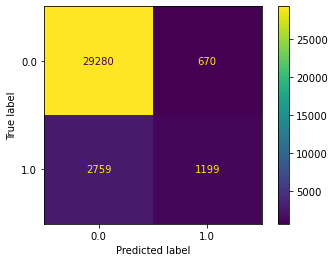

In [46]:
y_hat = logreg.predict(X)
accuracy = accuracy_score(y, y_hat)
print("Accuracy (train)  %0.1f%% " % ( accuracy * 100))
print(confusion_matrix(y, y_hat))
plot_confusion_matrix(logreg, X, y)  
plt.show()

Accuracy (test)  89.9% 
[[9760  212]
 [ 927  404]]


C:\Users\raulc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


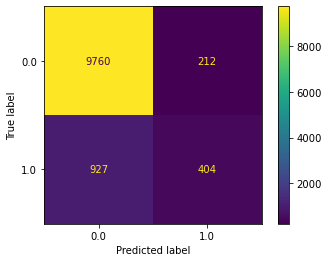

In [47]:
X = TestDB[InputFeatures]
y = TestDB['y']
y_hat = logreg.predict(X)
accuracy = accuracy_score(y, y_hat)
print("Accuracy (test)  %0.1f%% " % ( accuracy * 100))
print(confusion_matrix(y, y_hat))
plot_confusion_matrix(logreg, X, y)  
plt.show()

###  Method sensitive to the scale of the data
####  Further in the course we will see a better way of solving this problem (hint: look at from sklearn.preprocessing import StandardScaler)

Logistic regression can be sensitive to the scale of the data, especially when using regularization techniques.

To mitigate this issue, it's recommended to standardize the input variables to have a mean of 0 and a standard deviation of 1 before fitting the logistic regression model. This process is known as feature scaling or normalization, and it ensures that all input variables are on the same scale and have equal influence in the model. Standardizing the data can also improve the convergence rate of the optimization algorithm used to fit the logistic regression model.

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.000000,33.000000,39.000000,48.000000,95.000000
job,45211.0,8.631771,2.847568,1.000000,7.000000,9.000000,10.000000,12.000000
marital,45211.0,2.319037,0.884908,1.000000,1.000000,3.000000,3.000000,3.000000
education,45211.0,2.477937,1.068177,1.000000,2.000000,2.000000,4.000000,4.000000
default,45211.0,-0.963947,0.266098,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
housing,45211.0,0.111676,0.993756,-1.000000,-1.000000,1.000000,1.000000,1.000000
loan,45211.0,-0.679547,0.733640,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
contact,45211.0,1.776293,0.549747,1.000000,1.000000,2.000000,2.000000,3.000000
day,45211.0,15.806419,8.322476,1.000000,8.000000,16.000000,21.000000,31.000000
month,45211.0,6.144655,2.408034,1.000000,5.000000,6.000000,8.000000,12.000000


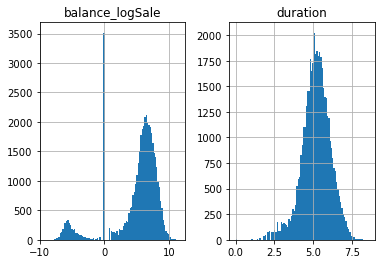

In [48]:
Data['balance_logSale'] = np.log(np.abs(Data['balance'])+1)*np.sign(Data['balance'])
Data['duration'] = np.log(Data['duration']+1)
Data[['balance_logSale','duration']].hist(bins = 100)
Data=Data.drop('balance',axis=1)
Data.describe().T

##  Now we have two gaussians !!!!

### We update the database

In [49]:
TrainDB,TestDB = PartitionOfDatabase(Data,Fraction = 0.75)
TrainDB = TrainDB.astype('float')
TestDB = TestDB.astype('float')
y = TrainDB['y']
InputFeatures = [fea for fea in TrainDB.columns if  fea != 'y']
print(f' Input variables: \n {InputFeatures}')
print('_'*50)
X = TrainDB[InputFeatures]

 Input variables: 
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'balance_logSale']
__________________________________________________


In [50]:
logreg = LogisticRegression(solver='newton-cg',penalty = 'l2',C=1,max_iter = 1000,fit_intercept = True)
logreg.fit(X, y)

LogisticRegression(C=1, max_iter=1000, solver='newton-cg')

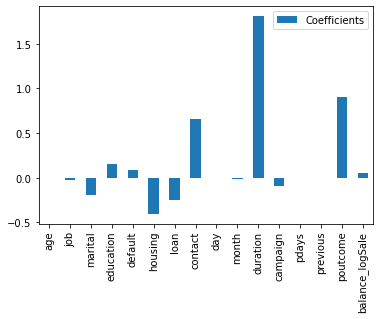

In [51]:
Features = X.columns
df = pd.DataFrame(data = logreg.coef_.T, index = Features, columns = ['Coefficients'] )
ax = df.plot.bar()

## Homework: <font color='red'> Explain what has happened. Why irrelvant variables in one scale are important in another scale.</font>  

The coefficients have changed quite a lot, both in terms of importance and also in sign ('campain', for example). This is because the transformation affects the range and distribution of the input variables, which can change the relationships between the input variables and the outcome variable.

In some cases, variables that were previously deemed irrelevant or non-significant may become more important or significant after scaling. This is because the scaling can reveal hidden patterns or relationships in the data that were not apparent before. For example, in the original scale, a variable with a small range of values like 'duration' may have been deemed unimportant because it didn't show much variation. However, after scaling, the variable may show more variation and reveal a stronger relationship with the outcome variable.

It's important to note that the change in coefficients doesn't necessarily mean that the variables have become more important or relevant in absolute terms. Rather, it reflects the changes in the relationships between the input variables and the outcome variable due to the scaling. It's also noticeable that some variables that were previously important become less important or non-significant after scaling.

## Performance index: Accuracy score

**Definition:**
$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$

**Note:** There are more performance indices. We will see them further in the course.

Accuracy (train)  89.8% 
[[29246   708]
 [ 2755  1199]]


C:\Users\raulc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


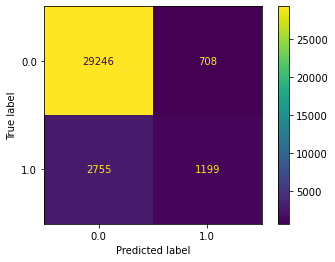

In [52]:
y_hat = logreg.predict(X)
accuracy = accuracy_score(y, y_hat)
print("Accuracy (train)  %0.1f%% " % ( accuracy * 100))
print(confusion_matrix(y, y_hat))
plot_confusion_matrix(logreg, X, y)  
plt.show()

## Homework: <font color='red'> Compute the Accuracy in the test database.</font> 


Accuracy (test)  89.8% 


C:\Users\raulc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[9727  241]
 [ 909  426]]


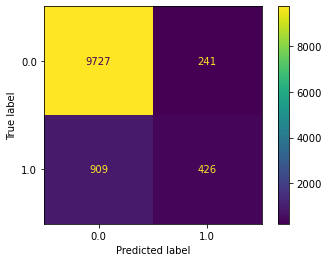

In [53]:
X = TestDB[InputFeatures]
y = TestDB['y']
y_hat = logreg.predict(X)
accuracy = accuracy_score(y, y_hat)
print("Accuracy (test)  %0.1f%% " % ( accuracy * 100))
print(confusion_matrix(y, y_hat))
plot_confusion_matrix(logreg, X, y)  
plt.show()

We have seen that accuracy has been quite similar in both the linear data and in the log-scaled data. However, we must remember that the dataset is unbalanced and a perdictor that always predicted negative would have an accuracy of already >70%!

## Homework: <font color='red'>  Do some feature engineering for improving the performance. Try to justify the feature engineering from your understanding of the problem, i.e. common sense and probability distributions.</font> 

- Try to reduce collinearity.
- Data is quite unbalanced, an option to imporve would be to implement resampling techiniques. There are several techniques available for both undersampling and oversampling, such as random undersampling or SMOTE (Synthetic Minority Over-sampling Technique).
- Find transformations in features like 'pdays', that intuitively, from its definition have many information, to make it able for the model to grasp.
- Find dummy variables that ease information extraction.

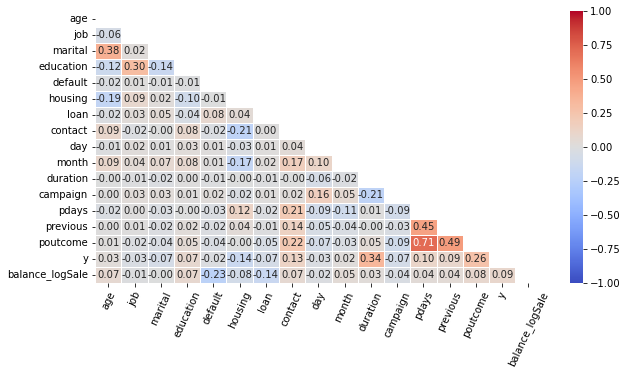

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))

df_corr = Data.corr(method='pearson')
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=df_corr, vmin=-1, vmax=1, mask=mask, 
            cmap=sns.color_palette('coolwarm', as_cmap=True),
            annot=True, fmt='.2f', linewidths=.5, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=65);

In [55]:
# If the correlation between two features is extremely high we will discard one of the features. We want to avoid multicollinearity
columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
                
numerical_selected_columns = df_corr.columns[columns]
numerical_selected_columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'balance_logSale'],
      dtype='object')

In [56]:
Data[numerical_selected_columns].corr(method='pearson').style.background_gradient()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_logSale
age,1.000000,-0.062297,0.376104,-0.122559,-0.017879,-0.185513,-0.015655,0.092577,-0.009120,0.092903,-0.003575,0.004760,-0.023758,0.001288,0.012238,0.025155,0.069922
job,-0.062297,1.000000,0.020649,0.298604,0.009114,0.085475,0.027813,-0.020040,0.022180,0.041532,-0.014649,0.030202,0.000129,0.005518,-0.018495,-0.034353,-0.014985
marital,0.376104,0.020649,1.000000,-0.144211,-0.009584,0.020202,0.046738,-0.001376,0.007701,0.069718,-0.015904,0.029121,-0.029490,-0.015676,-0.037141,-0.065668,-0.002812
education,-0.122559,0.298604,-0.144211,1.000000,-0.013777,-0.097042,-0.044324,0.082033,0.025125,0.076157,0.000986,0.008809,-0.001909,0.023601,0.048749,0.072493,0.071998
default,-0.017879,0.009114,-0.009584,-0.013777,1.000000,-0.006025,0.077234,-0.024095,0.009424,0.014989,-0.008856,0.016822,-0.029979,-0.018329,-0.037940,-0.022419,-0.226080
housing,-0.185513,0.085475,0.020202,-0.097042,-0.006025,1.000000,0.041323,-0.207722,-0.027982,-0.173887,-0.000382,-0.023599,0.124178,0.037076,-0.000527,-0.139173,-0.083314
loan,-0.015655,0.027813,0.046738,-0.044324,0.077234,0.041323,1.000000,0.000058,0.011370,0.021638,-0.008917,0.009980,-0.022754,-0.011043,-0.047586,-0.068185,-0.144146
contact,0.092577,-0.020040,-0.001376,0.082033,-0.024095,-0.207722,0.000058,1.000000,0.038643,0.167103,-0.001357,0.020046,0.210651,0.139518,0.221644,0.130590,0.068157
day,-0.009120,0.022180,0.007701,0.025125,0.009424,-0.027982,0.011370,0.038643,1.000000,0.101989,-0.056959,0.162490,-0.093044,-0.051710,-0.072629,-0.028348,-0.022345
month,0.092903,0.041532,0.069718,0.076157,0.014989,-0.173887,0.021638,0.167103,0.101989,1.000000,-0.020746,0.054868,-0.108940,-0.035600,-0.034324,0.018717,0.045257


Age, job, marital and education are related, but that seems normal.

The VIF measures how much the variance of the estimated regression coefficient is increased due to collinearity. Features with high VIF values (typically above 5 or 10) are likely to be highly correlated with other features and should be considered for removal.

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = Data
X = df.drop('y', axis=1)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

           features        VIF
0               age  17.695825
1               job  10.770603
2           marital   9.304806
3         education   7.281990
4           default  13.241972
5           housing   1.151960
6              loan   1.907050
7           contact  12.502637
8               day   4.678060
9             month   8.005487
10         duration  22.030539
11         campaign   1.887461
12            pdays   2.549225
13         previous   1.435841
14         poutcome   9.596732
15  balance_logSale   2.902591


Together with the correlation matrix and the VIF factor we cosider weather to eliminate features from the model or to combine several of them into a single new feature.

Create dummy variables that potentially could have some meaning.

In [58]:
Data['is_month_5'] = (Data['month'] == 5).astype(int)
# Data['is_unemployed'] = (Data['job'] == 4).astype(int) # Quite meaningful in my opinion.
Data['is_old'] = (Data['age'] >= 60).astype(int) # Excuse the nomenclature
Data['is_single'] = (Data['marital'] == 1).astype(int) 


# Take most the info in a numerical variable into categoricals.
Data['never_contacted'] = (Data['pdays'] == -1).astype(int) 
Data['pdays_less_5']= ((Data['pdays']<5) & (Data['pdays']>=0))
Data['pdays_greater_15'] = ((Data['pdays']>15) & (df['pdays']<999))
Data['pdays_bet_5_15'] = ((Data['pdays']>=5)&(df['pdays']<=15))

Create new interaction terms:

In [59]:
Data['interact1'] = Data['balance_logSale']*Data['campaign']
Data['interact2'] = Data['campaign'] / Data['pdays']
Data['interact4'] = Data['age'] * Data['marital']
Data['interact5'] = Data['job'] * Data['education']

Data = Data.drop(['balance_logSale','age','campaign','pdays','job','education','marital'], axis=1)

We standarize each feature, since standarizing in logistic regression can lead to better results.

In [60]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

In [61]:
TrainDB,TestDB = PartitionOfDatabase(Data,Fraction = 0.75)
InputFeatures = [fea for fea in TrainDB.columns if  fea != 'y']

X_train = TrainDB[InputFeatures]
X_train = scaler.fit_transform(X_train)
y_train = TrainDB['y']
X_test = TestDB[InputFeatures]
X_test = scaler.fit_transform(X_test)
y_test = TestDB['y']

In [62]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()

# Fit and apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Resample the data
np.mean(y_resampled)

0.5

In [63]:
clf = LogisticRegression(solver='newton-cg',penalty = 'l2',C=1,max_iter = 1000,fit_intercept = True)

clf.fit(X_train, y_train)

# Evaluate the model on the original testing data
y_pred = clf.predict(X_test)

Accuracy (test)  90.0% 
[[9757  230]
 [ 901  415]]


C:\Users\raulc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


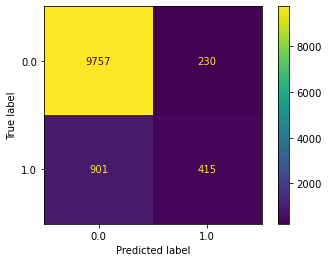

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (test)  %0.1f%% " % ( accuracy * 100))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

We have achieved a small improvement with the feature engineering. However, not amazing results...

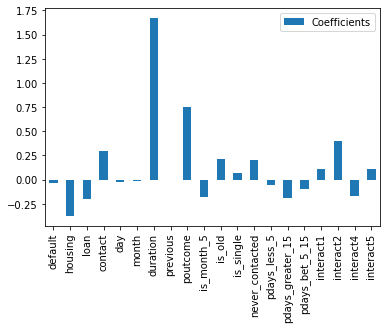

In [65]:
df = pd.DataFrame(data = clf.coef_.T, index = InputFeatures, columns = ['Coefficients'] )
ax = df.plot.bar()

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      9987
         1.0       0.64      0.32      0.42      1316

    accuracy                           0.90     11303
   macro avg       0.78      0.65      0.68     11303
weighted avg       0.88      0.90      0.88     11303



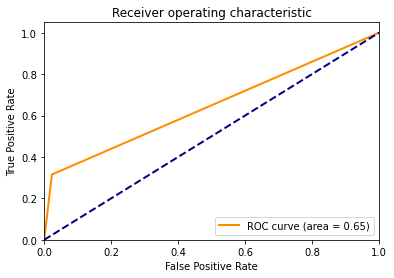

In [67]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test is the true target labels and y_pred_prob is the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Accuracy (test)  90.0% 
[[9757  230]
 [ 901  415]]


C:\Users\raulc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


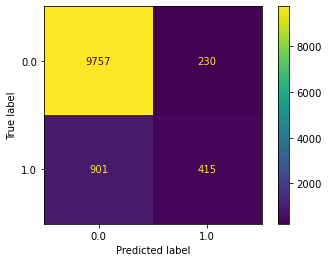

In [68]:
clf2 = LogisticRegression(solver='newton-cg',penalty = 'l2',C=1,max_iter = 1000,fit_intercept = True)

clf2.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (test)  %0.1f%% " % ( accuracy * 100))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

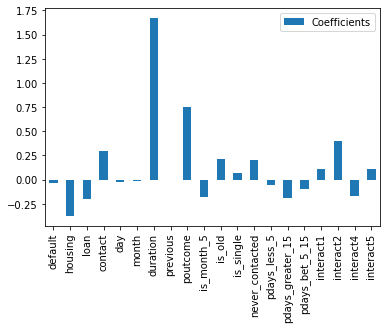

In [69]:
df = pd.DataFrame(data = clf.coef_.T, index = InputFeatures, columns = ['Coefficients'] )
ax = df.plot.bar()

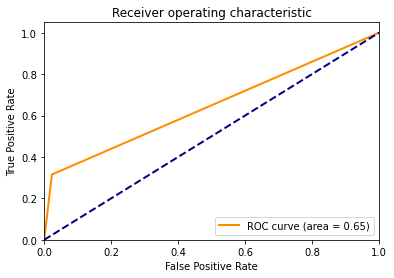

In [70]:
# Assuming y_true is the true target labels and y_pred_prob is the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      9987
         1.0       0.64      0.32      0.42      1316

    accuracy                           0.90     11303
   macro avg       0.78      0.65      0.68     11303
weighted avg       0.88      0.90      0.88     11303



Oversampling did not lead to an increase of model performance. 

For sure, there are lots of ways to improve the model's performance. One would be to perform a better feature enginieering or to make an overlier analysis or perform cross validation on the model's hyperparameters.

# Apendix: Description of the database

### For more information, read [Moro et al., 2011].

   Input variables:
   ### bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: 
   "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   ### related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  

  ## Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")